## 19.2.2 Build a Basic Neural Network

In [ ]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

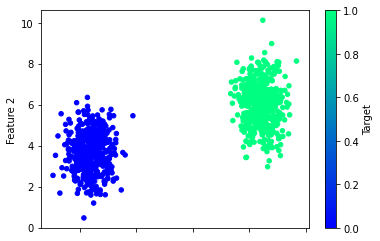

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 78)

# Creating DataFrame with the dummy data
df = pd.DataFrame(X, columns = ["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x = "Feature 1", y = "Feature 2", c = "Target", colormap = "winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## 19.2.3 Train and Test a Basic Neural Network
Beks has her first neural network modeled and compiled. It's time to put that dummy data to use.

Beks knows that neural networks can be prone to overfitting, so she wants to be extra careful with her training and testing sets.

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 3ms/step - loss: 0.7443 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7274 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.0013
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.0213
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.0573
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.1493
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.3067
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 

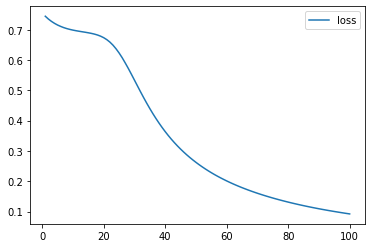

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

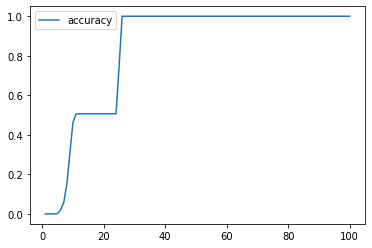

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0941 - accuracy: 1.0000 - 156ms/epoch - 20ms/step
Loss: 0.09414615482091904, Accuracy: 1.0


In [ ]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

## 19.2.4 Naunces of Neural Networks on Nonlinear Numbers
Beks is really excited about her first single-neuron, single-layer model. She knows this model 
will work really well on linear data. But she also knows the foundation's work, and knows that 
some of the relationships that Andy will want to see likely won't be linear. How can neural networks 
help Beks predict investments when the data is more complicated? Lucky for Beks, she has the work ethic 
to match any dataset. Time to dive back in!

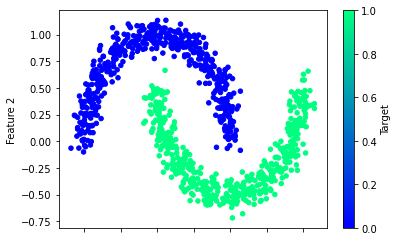

In [ ]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [ ]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [ ]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9466 - accuracy: 0.5133
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.5280
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8083 - accuracy: 0.5373
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7667 - accuracy: 0.5493
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.5560
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.5627
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5787
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5987
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6053
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6107
Epoch 11/

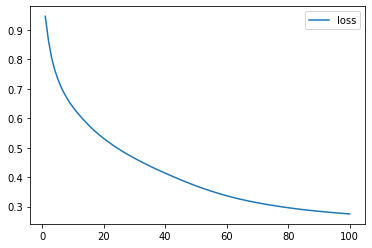

In [ ]:
# Create a DadtaFrame containing training history
history_df = pd.DataFrame(model_moon.history, index = range(1, len(model_moon.history["loss"])+1))
#Plot the loss
history_df.plot(y = "loss")

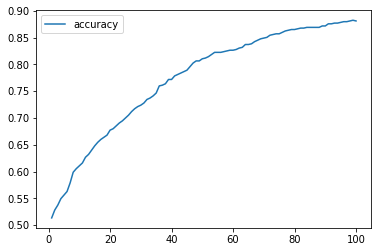

In [ ]:
# Plot the accuracy
history_df.plot(y = "accuracy")

**19.2.5 Create the Connective Tissue, the Multiple Neuron Neural Network**
Beks and Andy have a great relationship—Andy trusts Beks to develop the best possible models, and Beks puts in the work to make sure Andy has the information he needs to make decisions. So, even though Andy might not ask questions about a model that is correct 89% of the time, Beks isn't quite satisfied that it will actually serve the foundations—or the grantees—as well as it could. How might she make a model that performs a bit better? She decides to give multiple-neuron neural networks a try.

In [ ]:
# Generate a new Sequential model
new_model = tf.keras.models.Sequential()

In [ ]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units = number_hidden_nodes, 
                                    activation = "relu", 
                                    input_dim = number_inputs))

# Add the output layer that uses a probalility activation function
new_model.add(tf.keras.layers.Dense(units = 1, 
                                    activation = "sigmoid"))

In [ ]:
from sklearn.utils import shuffle
# Compile the Sequential model together and customize metrics
new_model.compile(loss = "binary_crossentropy", 
                  optimizer = "adam", 
                  metrics = ["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5168 - accuracy: 0.4720
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7667
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.8240
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8347
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8493
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8613
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8600
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8613
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8653
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8720
Epoch 11/

**19.2.6 Give Your Model a Synaptic Boost**
Beks is almost ready for a break—she's come a long way in just one day of work! Before she signs off, she decides to explore if there are any quick-and-dirty methods to give her model a little boost.

In [ ]:
# SKILL DRILL: Try plotting a variable using Pandas' Series.plot method to look 
# for outliers that can help identify if a particular numerical variable is 
# causing confusion in a model. Try leaving out a noisy variable from the rest 
#of the training features and see if the model performs better.